# Real Estate Evaluation (Regression)

Data Exploration And Visualization

In [1]:
from pandas import read_excel
# find your sheet name at the bottom left of your excel file and assign 
# it to sheet_name
my_sheet = 'mysheet'
file_name = 'Realestate.xlsx' # name of your excel file
data = read_excel(file_name, sheet_name = my_sheet)


In [2]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Import modules
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
import statsmodels.tools

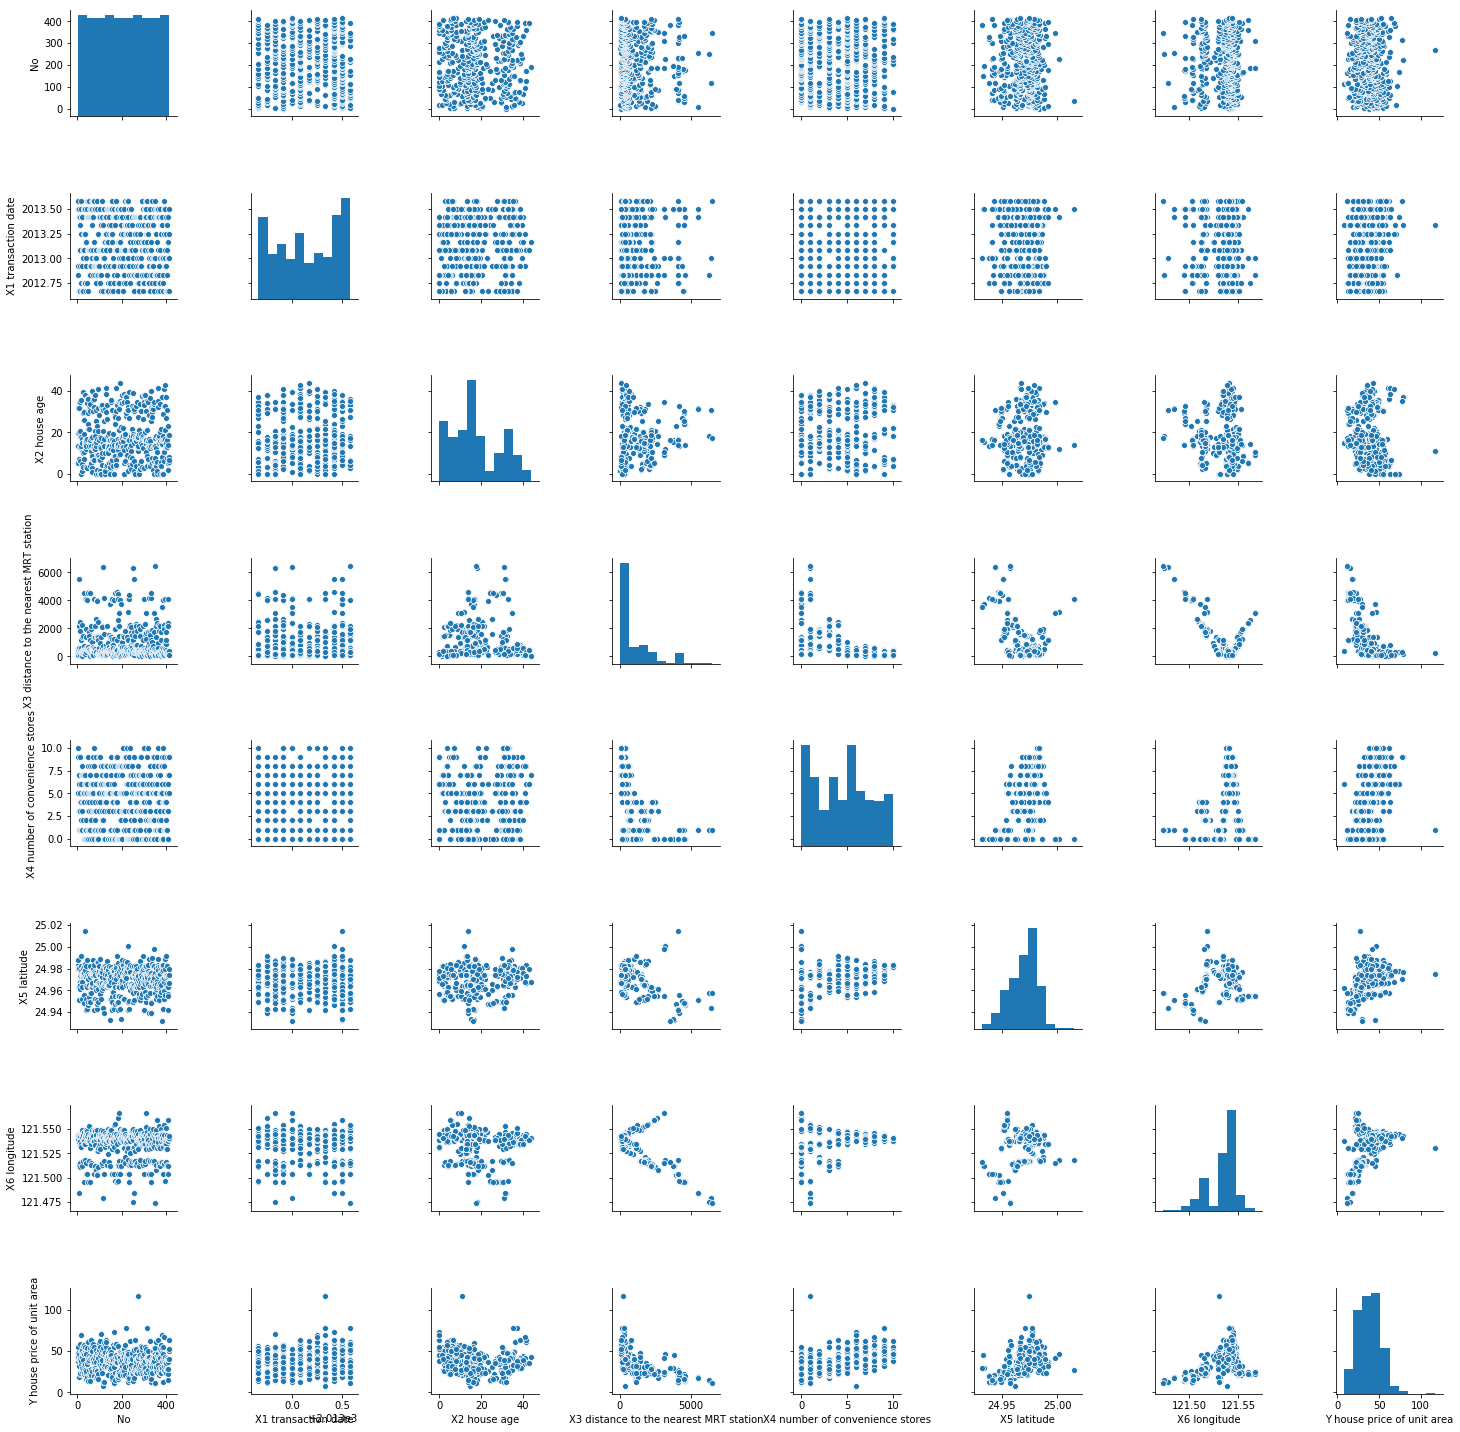

In [7]:
sns.pairplot(data)

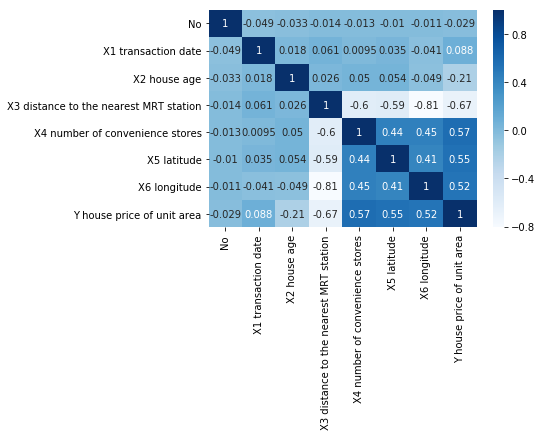

In [8]:
sns.heatmap(data.corr(),cmap = 'Blues', annot=True)

Building Linear Regression Model

In [9]:

X = data[['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
y = data['Y house price of unit area']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lm.coef_


array([ 4.84337397e+00, -2.74744806e-01, -4.18852496e-03,  1.18124639e+00,
        2.42385264e+02,  2.33986054e+01])

In [59]:
lm.score(X_test,y_test)

0.5975913255671386

In [61]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

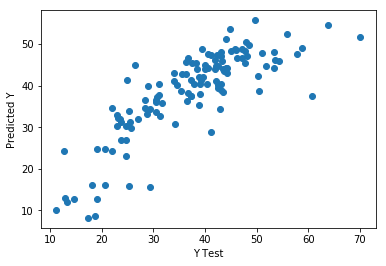

In [35]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [13]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 5.392382800671546
Mean Squared Error: 46.21083888823276
Root Mean Squared Error: 6.797855462440545


In [14]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
X1 transaction date,4.843374
X2 house age,-0.274745
X3 distance to the nearest MRT station,-0.004189
X4 number of convenience stores,1.181246
X5 latitude,242.385264
X6 longitude,23.398605


# Laso Prediction

In [37]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lm.coef_

array([ 0.        , -0.25967228, -0.0059276 ,  1.15293542,  0.        ,
       -0.        ])

In [38]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

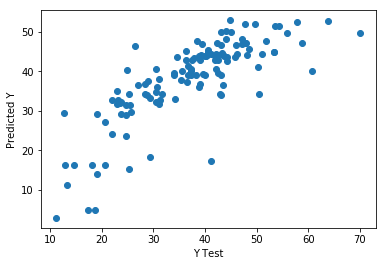

In [39]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 5.657545817178998
Mean Squared Error: 53.26937791225097
Root Mean Squared Error: 7.298587391560847


In [41]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
X1 transaction date,0.000000
X2 house age,-0.259672
X3 distance to the nearest MRT station,-0.005928
X4 number of convenience stores,1.152935
X5 latitude,0.000000
X6 longitude,-0.000000


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def randomforest (X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': range(1,20)}
    grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

In [18]:
randomforest(X_train, y_train, X_test, y_test)

C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

Best cross validation score: 0.61
Best parameters: {'max_depth': 14}
Test score: 0.7132790271508155


# Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
def gradientboosting (X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': range(1,6),  'n_estimators':[10,100,1000]}
    grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

In [20]:

gradientboosting (X_train, y_train, X_test, y_test)

Best cross validation score: 0.65
Best parameters: {'max_depth': 1, 'n_estimators': 100}
Test score: 0.7851603326730534


C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor
def knn (X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': range(1,100)}
    grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

In [22]:
knn (X_train, y_train, X_test, y_test)

Best cross validation score: 0.57
Best parameters: {'n_neighbors': 8}
Test score: 0.666107852354969


C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
def lassoreg (X_train, y_train, X_test, y_test):
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(Lasso(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

In [24]:
lassoreg(X_train, y_train, X_test, y_test)

Best cross validation score: 0.53
Best parameters: {'alpha': 0.01}
Test score: 0.6523930063762715


C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
def ridgereg (X_train, y_train, X_test, y_test):
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(Ridge(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

In [26]:
ridgereg (X_train, y_train, X_test, y_test)

Best cross validation score: 0.54
Best parameters: {'alpha': 0.01}
Test score: 0.6538831712385077


C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# DecisionTree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
def decisiontree (X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': range(1,100)}
    grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

In [28]:
decisiontree (X_train, y_train, X_test, y_test)

Best cross validation score: 0.58
Best parameters: {'max_depth': 2}
Test score: 0.6355645969097079


C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Supprt Vector Regression

C:\Users\faizan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score:  0.11244115186484294
Mean Squared Error: 117.49177069134497
Root Mean Squared Error: 10.83936209799013


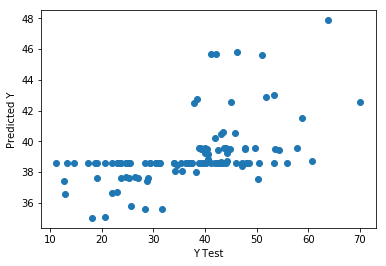

In [57]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 

model = SVR()
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
model.fit(X_train,y_train)
pred = model.predict(X_test)
  
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')




score=model.score(X_test,y_test)
print("score: ",score)

mse =mean_squared_error(y_test, pred)
print("Mean Squared Error:",mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)